# Метод стохастического градиента. Постановка задачи

## Обучение регрессии - это оптимизация

Обучающая выборка: $X^l = (x_i, y_i)_{i=1}^{l},\ x_i \in \mathbb{R}^n, y_i \in \mathbb{R}.$

- Модель регрессии - _линейная_ (взвешенная сумма всех признаков):

$$a(x,w) = \left\langle x, w\right\rangle = \sum\limits_{j=1}^{n}f_j(x)w_j,\ \ w_j \in \mathbb{R}^n.$$

- Функция потерь - _квадратичная:_

$$\mathscr{L}(a,y) = (a - y)^2.$$

Выписав в сумму функции потерь по всем объектам обучающей выборки, получаем функционал, который можно минимизировать по вектору весов линейной модели $w$.

- Метод обучения - _метод наименьших квадратов:_

$$Q(w) = \sum\limits_{i=1}^{l} \big(a(x_i, w) - y_i\big)^2 \rightarrow \min_w.$$

Тестовые выборки нужны для того, чтобы проверить, действительно ли алгоритм не переобучился, и модель восстанавливает искомую зависимость.

- Проверка на тестовой выборке $X^k = (\tilde{x}_i, \tilde{y}_i)_{i=1}^{k}$:

$$\tilde{Q}(w) = \frac{1}{k}\sum\limits_{i=1}^{k}\big(a(\tilde{x}_i, w) - \tilde{y}_i\big)^2.$$

## Обучение классификации - тоже оптимизация

Обучающая выборка: $X^l = (x_i, y_i)_{i=1}^{l},\ x_i \in \mathbb{R}^n, y_i \in \{-1, + 1\}.$

- Модель классификации - _линейная:_

$$a(x,w) = \mathrm{sign}\left\langle x, w\right\rangle.$$

Геометрический смысл состоит в том, что $w$ — это направляющий вектор разделяющей гиперплоскости в $n$-мерном пространстве. И если знак скалярного произведения положителен, то есть точка лежит по одну сторону от разделяющей гиперплоскости, то классифицируем объект за класс $+1$. Если знак скалярного произведения отрицателен, то считаем объектом класса $−1$.

Если выписать самую естественную функцию потерь, которая сразу напрашивается, эта функция потерь оказывается бинарной: либо классификатор ошибается, либо не ошибается. И эта функция потерь неудобна тем, что минимизировать получающийся функционал по вектору весов $w$ очень неудобно, так как этот функционал оказывается кусочно-постоянным. Нельзя продифференцировать и приравнять к нулю производную. Значит, чтобы упростить решение задачи, пользуются очень распространенным приемом подмены функционала. Вместо бинарной функции потерь будем использовать некоторую ее непрерывную аппроксимацию. 

- Непрерывная аппроксимация бинарной функции потерь:

$$\mathscr{L}(a, y) = \big[\left\langle x_i, w\right\rangle y_i < 0\big] \leq \mathscr{L}(\left\langle x_i, w\right\rangle y_i),$$

где $M_i(x) = \left\langle x_i, w\right\rangle y_i$ - _отступ_ (margin) объекта $x_i$.

Margin оценивает, насколько далеко объект отстоит от разделяющей поверхности, в данном случае от разделяющей гиперплоскости, причем знак этой величины показывает, насколько правильна классификация. Если знак положительный, значит ошибки нет, если знак отрицательный — ошибка есть, а абсолютная величина отступа показывает, насколько далеко объект находится от разделяющей поверхности.

__Если отступ отрицательный, то алгоритм ошибается.__

Поэтому можно взять величину отступа и штрафовать за то, что объект попал в чужой класс, то есть отступ отрицательный. Чем больше по абсолютной величине отрицательный отступ, тем больше должен быть штраф. Отсюда вывод: можно ввести непрерывную аппроксимацию бинарной функции потерь, если воспользоваться некоторой невозрастающей непрерывной функцией от отступа. Чем отступ больше, тем лучше, тем меньше значение функции потерь $\mathscr{L}$. 

И таким образом, снова можно свести задачу обучения к задаче оптимизации. Можно выписать функционал числа ошибок на обучающей выборке, а потом, воспользовавшись оценкой сверху для каждого слагаемого, получить новый функционал, который теперь уже дифференцируем по параметру, и в нем появилась некая степень свободы. Пороговую функцию потерь можно задать так, как нам удобно. 

- Метод обучения - _минимизация эмпирического риска:_

$$Q(w) = \sum\limits_{i=1}^{l} \big[a(x_i, w) y_i < 0\big] \leq \sum\limits_{i=1}^{l} \mathscr{L}(\left\langle x_i, w\right\rangle y_i) \rightarrow \min_w.$$

- Проверка на тестовой выборке $X^k = (\tilde{x}_i, \tilde{y}_i)_{i=1}^{k}$:

$$\tilde{Q}(w) = \frac{1}{k}\sum\limits_{i=1}^{k}\big[ \left\langle \tilde{x}_i, w\right\rangle \tilde{y}_i < 0 \big].$$

## Непрерывные аппроксимации пороговой функции потерь

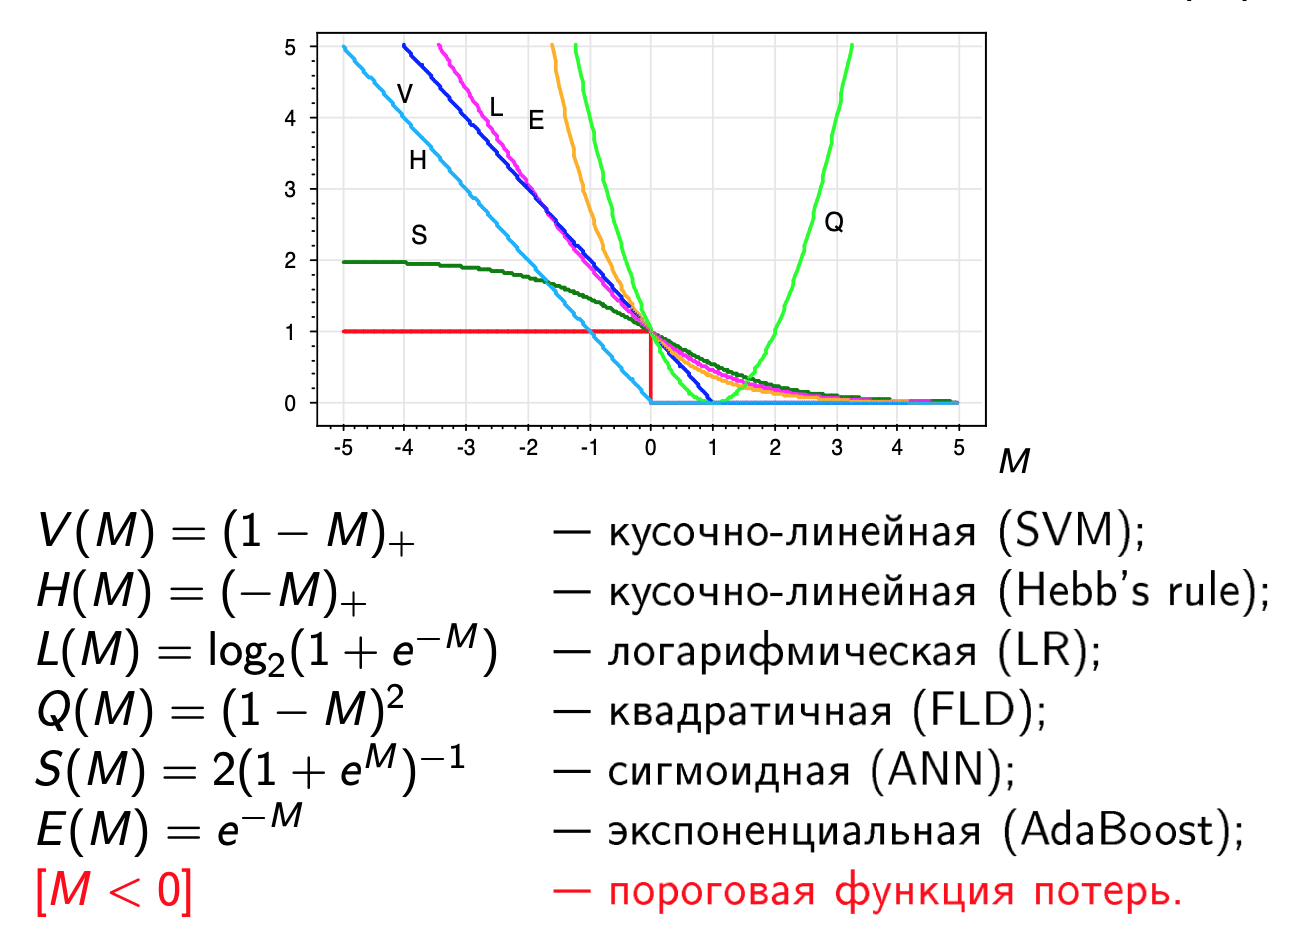

In [1]:
from IPython.display import Image
Image(filename='images/2.2 Линейные методы классификации/example_1.png')

# Градиентные методы численной минимизации и алгоритм SG

Какую же можно извлечь из этого выгоду? Можно применять различные методы численной оптимизации для того, чтобы минимизировать аппроксимированный функционал, поскольку он теперь является непрерывной функцией или даже гладкой, в зависимости от того, какую функцию потерь использовали. 

## Градиентный метод численной оптимизации

Минимизация эмпирического риска:

$$Q(w) = \sum\limits_{i=1}^{l} \mathscr{L}(g(w, x_i) y_i) = \sum\limits_{i=1}^{l} \mathscr{L}_i(w) \rightarrow \min_w.$$

Численная минимизация методом _градиентного спуска:_

- $w^{(0)} :=$ начальное приближение;

- $w^{(t+1)} := w^{(t)} - h \cdot \nabla Q(w^{(t)}),\ \ \nabla Q(w) = \Big(\frac{\partial Q(w)}{\partial w_j}\Big)_{j=0}^{n},$

где $h$ - _градиентный шаг,_ называемый также _темпом обучения._

$$w^{(t+1)} := w^{(t)} - h \sum\limits_{i=1}^{l} \nabla \mathscr{L}_i(w^{(t)}).$$

Каждая итерация — это небольшое смещение вектора весов по антиградиенту. Почему антиградиент? Градиент — это вектор, который показывает направление наискорейшего возрастания функции. Соответственно, минус этот вектор, или антиградиент, показывает направление наискорейшего убывания. То есть туда и надо идти, чтобы найти минимум функционала. 

Здесь возникает несколько проблем: проблема, будет ли этот метод сходиться; проблема выбора градиентного шага; проблема выбора начального приближения. Их рассмотрим позже.

Как ускорить этот процесс в том случае, когда функционал, который оптимизируем, представляет собой сумму большого числа слагаемых, а это как раз наш случай.

__Идея ускорения сходимости__:

- брать $(x_i, y_i)$ по одному и сразу обновлять вектор весов.

Идея ускорения сходимости здесь заключается в том, чтобы не вычислять сумму сразу по всем объектам, а брать каждый объект. Обычно их берут в случайном порядке по одному. И после каждого объекта обновлять вектор весов. Оказывается, что это приводит к существенному ускорению сходимости, это называется процедурой Роббинса–Монро, которая была уже более полувека назад предложена для решения задач оптимизации такого сорта функционалов, и называется методом стохастической аппроксимации.

## Алгоритм SG (Stochastic Gradient)

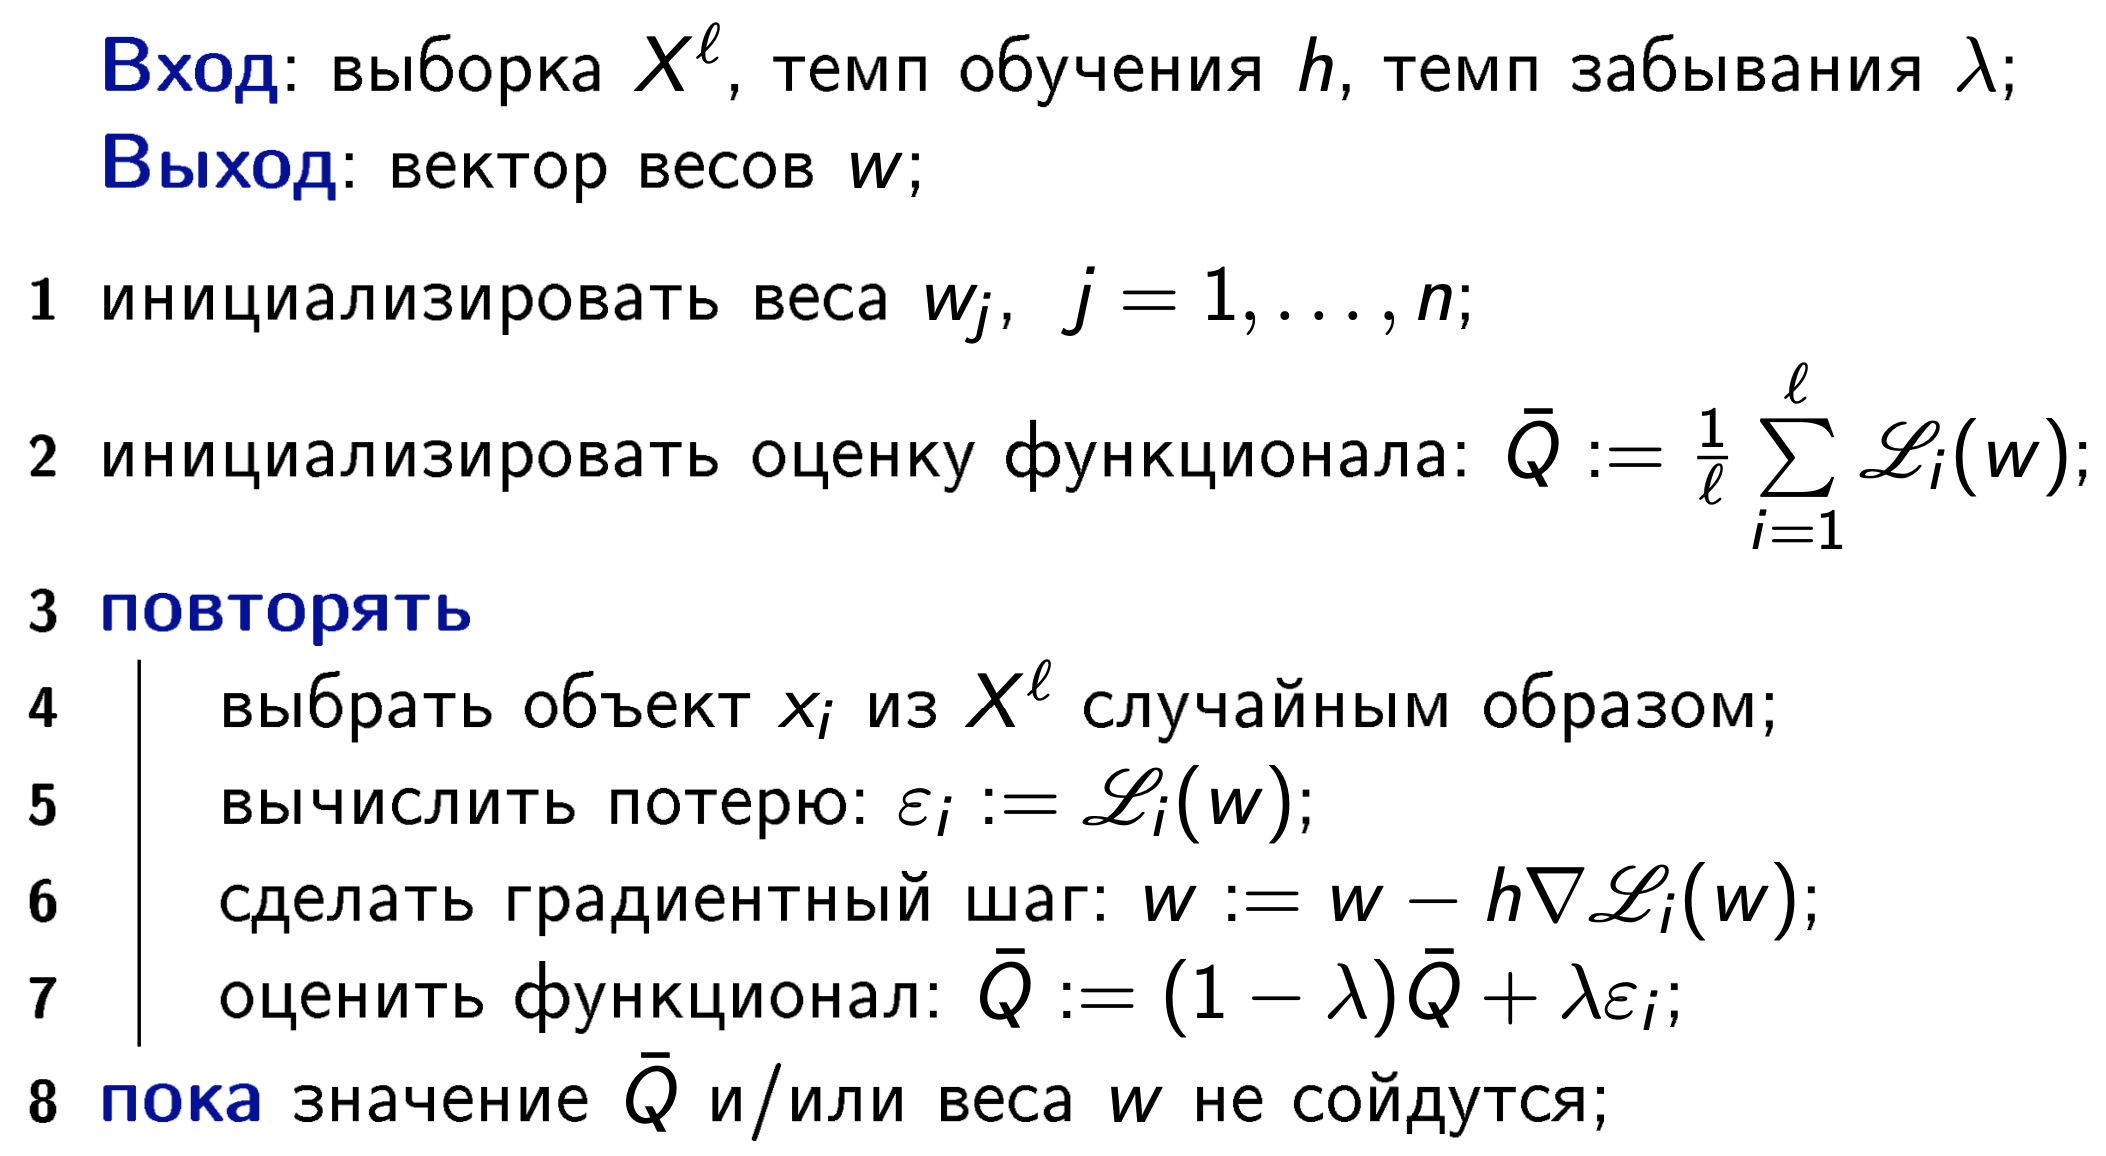

In [2]:
from IPython.display import Image
Image(filename='images/2.2 Линейные методы классификации/stochastic_gradient_1.png')

Процедура заключается в следующем: сначала инициализируется вектор весов. Потом, при текущем положении вектора весов вычисляется оценка функционала качества на обучающей выборке, естественно, с нашей аппроксимированной функцией потерь, и затем начинается основной процесс. 

На каждом шаге этого итерационного процесса выбирается объект из обучающией выборки случайным образом. Вычисляется значение функции потерь, обозначенного $\epsilon_i$, и делается градиентный шаг. А дальше, может быть, несколько нетривиальный ход, надо с учетом сделанной поправки к вектору весов переоценить значение функционала. Это нужно для того, чтобы понять, в какой момент останавливаться, когда значение функционала к чему-то сойдется или перестанет существенно меняться. 

Здесь использована формула экспоненциального скользящего среднего для того, чтобы подсчитать, ну пусть не точно значение функционала на всех объектах обучающей выборки, но по быстрой рекурентной формуле оценить среднее значение функционала, среднее значение функции потерь, которая получалась на последних итерациях. Это тоже такой прием, который позволяет здесь не потерять вычислительную эффективность метода за счет вычисления функционала качества на всей обучающей выборке.

Благодаря какой особенности метода стохастического градиента не требуется, чтобы вся выборка хранилась в памяти?

- Одна итерация стохастического градиента зависит только от одного объекта — можно считывать их с диска по одному, или же брать из некоторого потока

## Откуда взялась такая оценка функционала?

__Проблема__: после каждого шага $w$ по одному объекту $x_i$, не хотелось бы оценивать $Q$ по всей выборке $x_1, \ldots, x_l$.

__Решение__: использовать рекуррентную формулу.

Среднее арифметическое $\overline{Q}_m = \frac{1}{m}\sum_{i=1}^{m}\epsilon_i:$

$$\overline{Q}_m = (1 - \frac{1}{m}) \overline{Q}_{m-1} + \frac{1}{m}\epsilon_{m}.$$

_Экспоненциальное скользящее среднее_

$$\overline{Q}_m := (1 - \lambda) \overline{Q}_{m-1} + \lambda\epsilon_{m};$$

$$\overline{Q}_m := \lambda\epsilon_{m} + \lambda(1 - \lambda)\epsilon_{m-1} + \lambda(1 - \lambda)^2\epsilon_{m-2} + \lambda(1 - \lambda)^3\epsilon_{m-3} + \ldots$$

Параметр $\lambda \approx \frac{1}{m}$ называется _темпом забывания._ Чем больше $\lambda$, тем быстрее забывается предыстория ряда.

Расписав по полученной рекурентной формуле, что же за сумма вычисляется, получается, что это сумма всех значений $\epsilon_i$-тых, но вес этих значений убывает по мере того, как это значение дальше остается в прошлом. Можно сказать, что это темп забывания тех ошибок, которые допускались на каждой итерации.

Можно оценить, что значение параметра $\lambda$, если выбрать его $\frac{1}{100}, то это будет примерно эквивалентно тому, что усредняется значение функционала на ста последних объектов, которые брались для обучения в методе стохастического градиента.

## Алгоритм SAG (Stochastic Average Gradient)

Это обобщение метода стохастического градиента. Стохастический усредненный градиент отличается повышенной скоростью сходимости. Она достигается за счет того, что несмотря на то, что каждый объект по прежнему выбирается случайным образом из обучающей выборки, но градиент делается суммарный по всем объектам выборки. Каким образом это достигается? 

Тем, что сначала мы вычисляем $G_i$ — это градиент для каждого объекта. Затем мы вычислим сумму градиентов по всем объектам выборки. И для того, чтобы сделать градиентный шаг, после того, как мы на $i$-том объекте обновили значение градиента, мы из этой суммы должны старое значение градиента вычесть, а новое добавить. Естественно, эта сумма $G_i$ на каждом шаге перевычисляться не должна. Это бы было слишком долго. А вот такое инкрементное обновление, оно приводит к тому, что алгоритм становится существенно лучше сходящимся, потому что на каждом шаге не мечемся в направлении градиента, грубо оцененного по одному объекту, а целенаправленно идем по антиградиенту всего функционала, оцененного по всей обучающей выборке. За счет этого достигается повышение скорости сходимости.

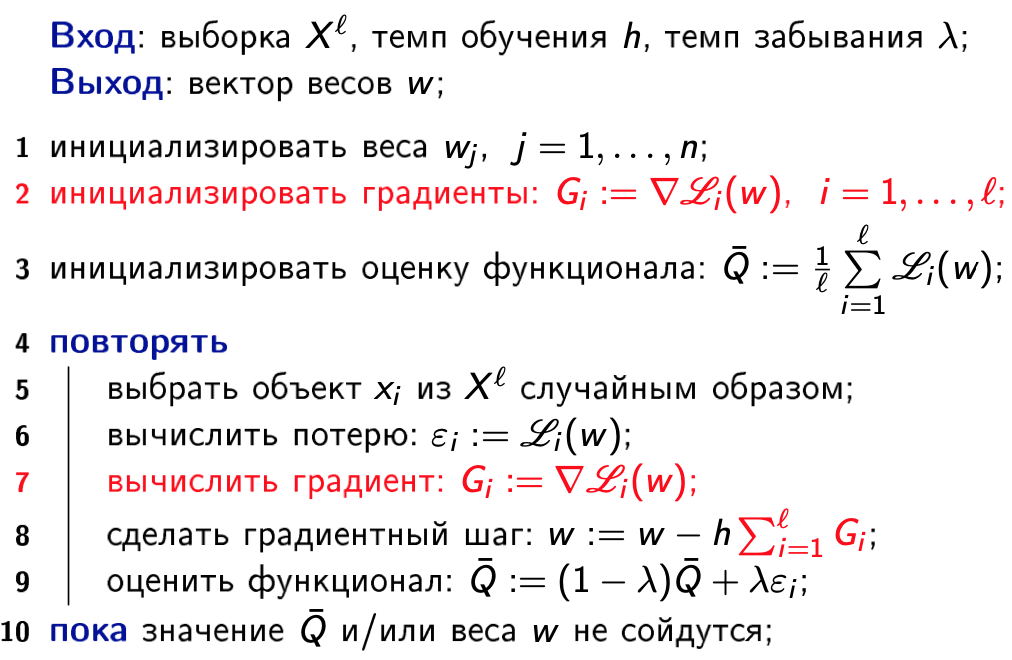

In [3]:
Image(filename='images/2.2 Линейные методы классификации/sag_1.png')

## Резюме

- Когда мы штрафуем объекты за приближение к границе между классами, то за счет этого мы как бы раздвигаем классы и получаем более надежный классификатор, который проводит разделяющую поверхность как можно дальше от объектов выборки. 

- _Непрерывная аппроксимация пороговой функции потерь_ $[M < 0] \leq \mathscr{L}(M)$ позволяет использовать градиентную оптимизацию и повышает качество классификации благодаря увеличению зазора между классами.

- SG легко обобщается для нелинейных моделей $g(w, x)$.

- и для любых функций потерь, $\mathscr{L}_i(w) = \mathscr{L}(g(x_i, w), y_i).$

- SG допускает онлайновое (потоковое) обучение.

- SG подходит для больших данных, т. к. дает неплохие решения, даже не обработав всю выборку $(x_i, y_i).$

# Метод стохастического градиента. Достоинства и недостатки

## Метод стохастического градиента (Stochastic Gradient)

__Достоинства__:

- легко реализуется

- применим к любым моделям и функциям потерь

- допускает онлайновое (потоковое) обучение

- на сверхбольших выборках позволяет получать неплохие решения, даже не обработав все $(x_i, y_i)$

- все чаще применяется для Big Data

__Недостатки__:

- функционалы, которые получаются в задачах машинного обучения, являются многоэкстремальными, а какие-то обоснования сходимости для метода стохастического градиента известны главным образом только для выпуклых функций. А пытаемся его применять для невыпуклых функций, поэтому сходимость есть, но она только локальная, к локальному экстремуму, и как найти хорошее начальное приближение, которое приведёт нас к удачному локальному экстремуму, это важный вопрос. 

- возможно застревание в локальных экстремумах

- возможна расходимость или очень медленная сходимость

- возможно переобучение, из-за неприятного эффекта, который называется мультиколлинеарностью

- подбор комплекса эвристик является искусством

## Варианты инициализации весов

- $w_j := 0$ для всех $j = 0, \ldots, n;$

- небольшие случайные значения:

$$w_j := \mathrm{random}(-\frac{1}{2n}, \frac{1}{2n});$$

Но это не всегда хорошо работает и не всегда ведёт к хорошим локальным решениям. Неплохие эвристики для инициализации можно получить, если воспользоваться очень простыми методами регрессии или классификации, которые основаны, можно так сказать, на драконовских предположениях. Это предположение о некоррелированности или независимости признаков.

Первая — для задачи регрессии, очень простая формула, которая заключается в том, что вычисляется скалярное произведение между векторами признаков и векторами правильных ответов на всех объектах обучающей выборки. 

- $w_j := \frac{\left\langle y, f_j\right\rangle}{\left\langle f_j, f_j\right\rangle},\ \ f_j = \big(f_j(x_i)\big)_{i=1}^{l}$ - вектор значений признака;

эта оценка $w$ оптимальна при квадратичной функции потерь, если признаки некоррелированы, $\left\langle f_j, f_k\right\rangle = 0, j\neq k.$

И примерно столь же простой способ инициализации для задач классификации, когда вы должны для каждого признака посчитать его среднее значение в каждом классе, и логарифмы этих средних значений как раз и являются неплохой инициализацией для вектора весов. 

- $w_j := \mathrm{ln}\frac{\sum_{i}[y_i=+1]f_j(x_i)\sum_i[y_i=-1]}{\sum_{i}[y_i=-1]f_j(x_i)\sum_i[y_i=+1]};$

эта оценка $w$ оптимальна для задач классификации, $Y = \{-1, +1\}$, если признаки независимы.

Но если признаки действительно по счастливой случайности окажутся независимыми, то эти формулы уже практически дают хорошее решение. 

Ещё одна эвристика заключается в том, что эти оценки можно считать по небольшим случайным подвыборкам. Это работает в том случае, когда выборка избыточна, вы видите перед собой десять миллионов объектов, но понятно, что эту инициализацию можно сделать, скажем, по случайной тысяче объектов. 

- оценки $w_j$ по небольшой случайной подвыборке объектов;

И ещё одна хорошая рекомендация — это метод мультистарта, который заключается в том, что вы подобного рода инициализацию, например, по случайным подвыборкам делаете многократно и получаете много исходных точек, из каждой из которой вы запускаете дальше итерационный процесс стохастического градиента, и может быть, какие-то из этих запусков приведут вас к более удачным локальным решениям.

- мультистарт: многократные запуски из разных случайных начальных приближений и выбор лучшего решения.

## Варианты порядка предъявления объектов

В каком же порядке предъявлять объекты? В методе стохастического градиента считается, что объекты надо брать в случайном порядке. Однако если сделать так, чтобы объекты брались не просто случайными, а чтобы они были существенно отличными друг от друга, то процесс сходимости пойдёт быстрее.

Возможны варианты:

- _перетасовка объектов_ (shuffling): попеременно брать объекты из разных классов. Эта эвристика, основанна на гипотезе компактности, потому что считается, что объекты одного класса, они, как правило, как-то компактно расположены. А если вы берёте объекты из разных классов, то они у вас получаются существенно различными;

- чаще брать те объекты, на которых была допущена б\'ольшая ошибка 
 - (чем меньше $M_i$, тем больше вероятность взять объект)
 - (чем меньше $|M_i|$, тем больше вероятность взять объект);
 
- вообще не брать "хорошие" объекты, у которых $M_i > \mu_{+}$ (при этом немного ускоряется сходимость);

- вообще не брать объекты-"выбросы", у которых $M_i < \mu_{-}$ (при этом может улучшиться качество классификации);

Параметры $\mu_{+}, \mu_{-}$ придется подбирать.

## Варианты выбора градиентного шага

- сходимость гарантируется (для выпуклых функций) при 

$$h_t \rightarrow 0, \sum\limits_{t=1}^{\infty}h_t = \infty,\ \ \sum\limits_{t=1}^{\infty}h_t^2 < \infty,$$

в частности можно положить $h_t = 1/t;$

На практике эта стратегия далеко не всегда работает, и потому что функции могут иметь очень непростой характер и из-за многоэкстремальности.

- более продвинутая стратегия — это _метод скорейшего градиентного спуска:_

$$\mathscr{L}_i(w - h\nabla \mathscr{L}_i(w)) \rightarrow \min_h,$$

позволяет найти _адаптивный шаг_ $h^*$;

при квадратичной функции потерь $h^* = ||x_i||^{-2}$;

- Чем отличается метод скорейшего градиентного спуска от классического градиентного спуска?

 - Длина шага выбирается так, чтобы как можно сильнее уменьшить функционал по результатам итерации.

- чтобы выбивать процесс из неудачных локальных экстремумов, рекомендуется периодически делать пробные случайные шаги в разных направлениях, получать тем самым очередное приближение, из которого дальше стартует градиентный процесс;

- метод Левенберга-Марквардта (второго порядка).

## Диагональный метод Левенберга-Марквардта

Метод Ньютона-Рафсона, $\mathscr{L}_i(w)\equiv \mathscr{L}(\left\langle w, x_i\right\rangle y_i)$:

$$w := w - h\Big(\mathscr{L''}_i(w)\Big)^{-1}\nabla \mathscr{L}_i(w),$$

где $\mathscr{L''}_i(w) = \Big(\frac{\partial^2 \mathscr{L}_i(w)}{\partial w_j \partial w_{j'}}\Big)$ - _гессиан,_ $n \times n$ матрица

__Эвристика__: считаем, что гессиан диагонален. Тогда

$$w_j := w_j - h\Big(\frac{\partial^2 \mathscr{L}_i(w)}{\partial^2 w_j} + \mu \Big)^{-1} \frac{\partial \mathscr{L}_i(w)}{\partial w_j},$$

$h$ - темп обучения, можно полагать $h=1$

$\mu$ - параметр, предотвращающий обнуление знаменателя.

Отношение $h/\mu$ есть темп обучения на ровных участках функционала $\mathscr{L}_i(w)$, где вторая производная обнуляется.

Получается, когда градиент большой, но вторая производная близка к нулю, это означает, что мы находимся где-то в районе точек перегибов функции, то есть это, скорее всего, далеко от локальных экстремумов, но в этой области мы можем делать нормальный, настоящий градиентный спуск. А вот когда мы заходим в область, локально близкую к экстремуму, то здесь уже надо пользоваться методами, близкими к методам второго порядка. 

Этот метод называется диагональным методом Левенберга-Марквардта, и отличается тем, что он очень быстро может быть реализован, он очень простой как для реализации, так и в смысле скорости вычислений. И, тем не менее, он сохраняет свойство метода второго порядка в окрестности локальных экстремумов. 

# Проблема переобучения

__Возможные причины переобучения__:

- линейная зависимость (мультиколлинеарность) признаков:
 - пусть построен классификатор: $a(x, w) = \mathrm{sign} \left\langle w, x\right\rangle$; 
 - мультиколлинеарность: $\exists u \in \mathbb{R}^{n+1}: \forall x \left\langle u, x\right\rangle \equiv 0$;
 - тогда $\forall \gamma \in \mathbb{R} a(x, w) = \mathrm{sign}\left\langle w + \gamma u, x\right\rangle$;
 
- слишком мало объектов; слишком много признаков;

__Проявления переобучения__:

- слишком большие веса $|w_j|$ разных знаков;

- неустойчивость классификаций $a(x, w)$ относительной погрешностей измерения признаков;

- $Q(X^l) \ll Q(X^k)$;

Какие подходы могут помочь бороться с переобучением?

- Удаление части признаков. Чем больше признаков, тем больше параметров у алгоритма и тем выше риск переобучения.

- Введение штрафов за большие веса признаков. Большие веса являются симптомом переобучения. Один из способов введения штрафов за веса называется регуляризацией — о нем пойдем речь далее в лекции.

## Регуляризация (сокращение весов, weight decay)

Штраф за увеличение нормы вектора весов:

$$\tilde{\mathscr{L}_i}(w) = \mathscr{L}_i(w) + \frac{\tau}{2}||w||^2 = \mathscr{L}_i(w) + \frac{\tau}{2} \sum\limits_{j=1}^{n}w_j^2 \rightarrow \min_w.$$

Градиент:

$$\nabla \tilde{\mathscr{L}_i}(w) = \nabla \mathscr{L}_i(w) + \tau w.$$

Модификация градиентного шага:

$$w := w(1 - h\tau) - h\nabla\mathscr{L}_i(w).$$

Подбор параметра $\tau$ - по скользящему контролю.

Добавочка, которая возникает, очень простая. Это всего лишь нужно в формуле градиентного шага домножить вектор весов на какое-то число меньшее единицы. Конечно, это число тоже хотелось бы подобрать, можно подобрать его по скользящему контролю и посмотреть, как при разных значениях этого коэффициента ведет себя обобщающая способность, то есть качество классификации независимой тестовой выборки.

## Резюме

- В методе стохастического градиента необходимы различные эвристики для улучшения сходимости и получения лучшего решения.

- _Регуляризация_ решает проблему мультиколлинеарности и снижает риск переобучения.

Верные утверждения про отступ (margin):

- Если отступ близок к нулю, надежность классификации этого объекта невысока. Действительно, если отступ близок к нулю, то объект находится рядом с разделяющей поверхностью, и поэтому не может быть уверенно отнесен к одному из классов.

- Если отступ на данном объекте больше нуля, то алгоритм дает верный ответ. Знак отступа действительно характеризует корректность ответа.

Верные утверждения про настройку линейных классификаторов:

- Хороший линейный классификатор должен минимизировать эмпирический риск — то есть число ошибок на обучающей выборке. Действительно, все методы настройки линейных классификаторов так или иначе пытаются минимизировать эмпирический риск.

- Минимизация эмпирического риска — очень сложная оптимизационная задача, поэтому он заменяется на другой функционал. Эмпирический риск не является гладким, из-за чего его нельзя оптимизировать с помощью градиентного спуска или аналогичных методов. Из-за этого приходится заменять его на гладкую аппроксимацию.

# Нормализация признаков

Линейные алгоритмы — распространенный класс моделей, которые отличается своей простотой и скоростью работы. Их можно обучать за разумное время на очень больших объемах данных, и при этом они могут работать с любыми типами признаков — вещественными, категориальными, разреженными. В этом задании мы предлагаем вам воспользоваться персептроном — одним из простейших вариантов линейных моделей.

Как и в случае с метрическими методами, качество линейных алгоритмов зависит от некоторых свойств данных. В частности, признаки должны быть нормализованы, то есть иметь одинаковый масштаб. Если это не так, и масштаб одного признака сильно превосходит масштаб других, то качество может резко упасть.

Один из способов нормализации заключается в стандартизации признаков. Для этого берется набор значений признака на всех объектах, вычисляется их среднее значение и стандартное отклонение. После этого из всех значений признака вычитается среднее, и затем полученная разность делится на стандартное отклонение.

## Реализация в Scikit-Learn

В библиотеке scikit-learn линейные методы реализованы в пакете sklearn.linear_model. Мы будем работать с реализацией персептрона sklearn.linear_model.Perceptron. Как и у большинства моделей, обучение производится с помощью функции fit, построение прогнозов — с помощью функции predict.

Пример использования:

In [5]:
import numpy as np
from sklearn.linear_model import Perceptron
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])
clf = Perceptron()
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

[0 0 0]


В качестве метрики качества мы будем использовать долю верных ответов (accuracy). Для ее подсчета можно воспользоваться функцией sklearn.metrics.accuracy_score, первым аргументом которой является вектор правильных ответов, а вторым — вектор ответов алгоритма.

Для стандартизации признаков удобно воспользоваться классом sklearn.preprocessing.StandardScaler. Функция fit_transform данного класса находит параметры нормализации (средние и дисперсии каждого признака) по выборке, и сразу же делает нормализацию выборки с использованием этих параметров. Функция transform делает нормализацию на основе уже найденных параметров.

Пример использования:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = np.array([[100.0, 2.0], [50.0, 4.0], [70.0, 6.0]])
X_test = np.array([[90.0, 1], [40.0, 3], [60.0, 4]])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Загрузите обучающую и тестовую выборки из файлов perceptron-train.csv и perceptron-test.csv. Целевая переменная записана в первом столбце, признаки — во втором и третьем.

In [73]:
import pandas as pd


data_train = pd.read_csv('data/perceptron-train.csv', header=None, names=['y', 'x1', 'x2'])
data_test = pd.read_csv('data/perceptron-test.csv', header=None, names=['y', 'x1', 'x2'])

data_train.head()

,y,x1,x2
0,-1.0,-0.024626,1174.600238
1,1.0,-0.978058,1083.198803
2,-1.0,0.314272,-1472.977609
3,-1.0,0.179752,231.017267
4,1.0,-1.262544,-778.271726


In [74]:
X_train, y_train = data_train.iloc[:, 1:], data_train.iloc[:, 0]
X_test, y_test = data_test.iloc[:, 1:], data_test.iloc[:, 0]

Обучите персептрон со стандартными параметрами и random_state=241.

In [75]:
from sklearn.linear_model import Perceptron


clf = Perceptron(random_state=241)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=241, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
from sklearn.metrics import accuracy_score


predictions_1 = clf.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)
print(accuracy_1)

0.655


Нормализуем обучающую и тестовую выборку с помощью класса StandardScaler.

In [77]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
clf = Perceptron()
clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)
accuracy_2 = accuracy_score(y_test, predictions)
print(accuracy_2)

0.845


In [79]:
print(accuracy_2 - accuracy_1)

with open('answers/2_2_ans_6.txt', 'w') as f:
    f.write(str('{:.3f}'.format(accuracy_2 - accuracy_1)))

0.18999999999999995


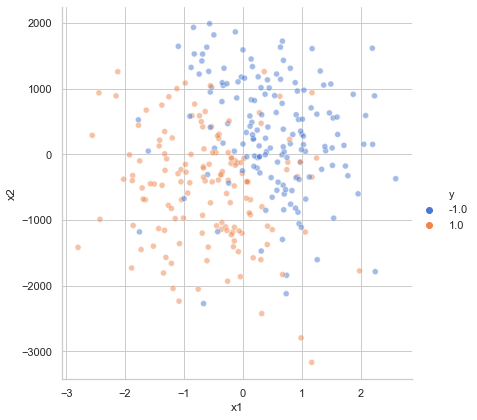

In [82]:
import seaborn as sns


sns.relplot(x='x1', y='x2', hue='y', 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_train)